In [119]:
import splat
import apogelette as ap
import apogee_tools as apt
import pandas as pd
from astropy.io import ascii, fits
from astropy.table import Table
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np
import os
import splat.database as spdb

## Input catalogs

In [2]:
all_star_dr14=ap.search_database(parameter='H', range=[0, 17])

 ALL stars with  H between [0, 17]


In [3]:
dwarfarchives_lt=pd.read_html('http://ldwarf.ipac.caltech.edu/archive/version5/viewlist.php?table=ltdwarf&format=html')[0]
dwarfarchives_m=pd.read_html('http://ldwarf.ipac.caltech.edu/archive/version5/viewlist.php?table=mdwarf&format=html')[0]
#some re-formatting for dwarfarchives: rename columns then combine them
dwarfarchives_lt.columns=dwarfarchives_lt.ix[0]
dwarfarchives_m.columns=dwarfarchives_m.ix[0]
#remove the first line since it's the name of columns
dwarfarchives_lt= dwarfarchives_lt.ix[2:]
dwarfarchives_m= dwarfarchives_lt.ix[2:]
dwarfarchives=dwarfarchives_lt.append(dwarfarchives_m)
dr='/Users/caganze/Research/apogee_all/apogelette/data/catalogs/'

In [4]:
speculous=pd.read_excel(dr+'SPECULOOS_targets.xlsx')
splat_bds=splat.searchLibrary(jmag=[1,17.0])
cb=fits.open(os.environ['APOGEE_DATA']+'/blake_mdwarf_info_dr14.fits')[1].data
t=Table(cb)
t.keep_columns(all_star_dr14.columns)
cullen_blake=t.to_pandas()
daniella=pd.read_csv(dr+'spexsample_488_short.csv')
latemvrs=pd.read_excel(dr+'NearbyLateMovers.xlsx')
banyan7=(Vizier.get_catalogs('J/ApJS/219/33/table4')[0]).to_pandas()

In [18]:
def ra_dec(des):
    coords=splat.designationToCoordinate(des)
    return pd.Series({'RA':coords.ra.value,'DEC':coords.dec.value })
radec1=latemvrs.Coordinate.apply(ra_dec)
radec2=speculous.DESIGNATION.apply(ra_dec)

latemvrs['RA']=radec1.RA
latemvrs['DEC']=radec1.DEC
speculous['RA']=radec2.RA
speculous['DEC']=radec2.DEC

## Functions 

In [6]:
def get_designation(coords):
    ra, dec=coords
    c=ap.Coordinate(ra=ra, dec=dec)
    return c.designation

In [7]:
def cross_match(cat1, cat2, radius, **kwargs):
    ra_key=kwargs.get('ra_key', 'RA')
    return spdb.queryXMatch(cat1,catalog=cat2, radius=radius)

In [8]:
splat.coordinateToDesignation?

In [9]:
cats = ['SIMBAD','2MASS','DENIS','ALLWISE','SDSS','GAIA']

In [17]:
speculous.columns

Index(['NAME', 'DESIGNATION', 'SPT', 'J', 'SPL_DataKey', 'DISTANCE',
       'OBJECT_TYPE', 'DESIGNATION_SIMBAD', 'LIT_SPT', 'SPT_REF', 'PARALLAX',
       'PARALLAX_E', 'MU_RA', 'MU_DEC', 'MU_REF', 'RV', 'RV_REF', 'VSINI',
       'VSINI_REF', 'JMAG', 'JMAG_E', 'HMAG', 'HMAG_E', 'KMAG', 'KMAG_E',
       'DESIGNATION_2MASS', 'JD_2MASS', 'DESIGNATION_SDSS', 'JD_SDSS', 'RMAG',
       'RMAG_E', 'IMAG', 'IMAG_E', 'ZMAG', 'ZMAG_E', 'DESIGNATION_WISE',
       'W1MAG', 'W1MAG_E', 'W2MAG', 'W2MAG_E', 'WISE_MU_RA', 'WISE_MU_RA_E',
       'WISE_MU_DEC', 'WISE_MU_DEC_E'],
      dtype='object')

## cross-matching routine

In [19]:
apbds=all_star_dr14
t1=ap.cross_match([apbds, daniella], {'RA':['RA','RA (deg)'], 'DEC':['DEC', 'DEC (deg)'],'CATALOG':'Daniella'}, separation=8.5)
#t2= ap.cross_match([apbds, banyan7], {'RA':['RA','_RA'], 'DEC':['DEC', '_DE'], 'CATALOG':'BANYAN VII'}, separation=20 )
t3= ap.cross_match([apbds, splat_bds], {'RA':['RA','RA'], 'DEC':['DEC', 'DEC'], 'CATALOG':'Splat'}, separation=10)
#t7=ap.cross_match([apbds, dwarfarchives], {'RA':['RA','ra'], 'DEC':['DEC', 'decl'], 'CATALOG':'DWARFARCHIVES'}, separation=10.0 )
t4= ap.cross_match([apbds, speculous], {'RA':['RA','RA'], 'DEC':['DEC', 'DEC'], 'CATALOG':'SPECULOUS'}, separation=6)
t5= ap.cross_match([apbds, latemvrs], {'RA':['RA','RA'], 'DEC':['DEC', 'DEC'], 'CATALOG':'LateMovers'}, separation=10.0)
t6= ap.cross_match([apbds, cullen_blake], {'RA':['RA','RA'], 'DEC':['DEC', 'DEC'], 'CATALOG':'BLAKE'}, separation=10.0)

catalog Daniella selects (17, (277337, 175)) (16, (488, 26))
                                            APSTAR_ID  \
9312    apogee.apo25m.s.stars.4476.2M00452143+1634446   
21681   apogee.apo25m.s.stars.4480.2M03122509+0021585   
68945   apogee.apo25m.s.stars.4123.2M06154934-0100415   
82091   apogee.apo25m.s.stars.4292.2M06521977-2534505   
86586   apogee.apo25m.s.stars.4221.2M07140394+3702459   
100405  apogee.apo25m.s.stars.2318.2M08185804+2333522   
120022  apogee.apo25m.s.stars.2115.2M11053133+4331170   
120023  apogee.apo25m.s.stars.2121.2M11053133+4331170   
122313  apogee.apo25m.s.stars.4510.2M11194647+0820356   
128958  apogee.apo25m.s.stars.2210.2M12080810+3520281   
147471  apogee.apo25m.s.stars.4233.2M13564148+4342587   
153165  apogee.apo25m.s.stars.4493.2M14402293+1339230   
156284  apogee.apo25m.s.stars.4437.2M15010818+2250020   
179292  apogee.apo25m.s.stars.4454.2M17031418+5910480   
187410  apogee.apo25m.c.stars.4387.2M17334253-1654573   
187411  apogee.apo25m.s.sta

catalog Splat selects (106, (277337, 175)) (115, (2896, 84))
                                            APSTAR_ID  \
9312    apogee.apo25m.s.stars.4476.2M00452143+1634446   
21681   apogee.apo25m.s.stars.4480.2M03122509+0021585   
28475   apogee.apo25m.s.stars.4586.2M03424919+3150110   
28507   apogee.apo25m.s.stars.4586.2M03425596+3158419   
28553   apogee.apo25m.s.stars.4586.2M03430679+3148204   
28585   apogee.apo25m.s.stars.4586.2M03431371+3200451   
28634   apogee.apo25m.s.stars.4586.2M03432548+3155165   
28647   apogee.apo25m.s.stars.4586.2M03432820+3201591   
28649   apogee.apo25m.s.stars.4586.2M03432845+3205058   
28653   apogee.apo25m.s.stars.4586.2M03432944+3152194   
28732   apogee.apo25m.s.stars.4586.2M03434763+3209025   
28733   apogee.apo25m.s.stars.4586.2M03434788+3217567   
28741   apogee.apo25m.s.stars.4586.2M03434881+3215515   
28797   apogee.apo25m.s.stars.4586.2M03435759+3201373   
28802   apogee.apo25m.s.stars.4586.2M03435856+3217275   
28809   apogee.apo25m.s.sta

catalog SPECULOUS selects (9, (277337, 175)) (8, (732, 46))
                                            APSTAR_ID  \
25385   apogee.apo25m.s.stars.4587.2M03290406+3117075   
68945   apogee.apo25m.s.stars.4123.2M06154934-0100415   
100405  apogee.apo25m.s.stars.2318.2M08185804+2333522   
108968  apogee.apo25m.s.stars.4450.2M09324827+2659443   
120022  apogee.apo25m.s.stars.2115.2M11053133+4331170   
120023  apogee.apo25m.s.stars.2121.2M11053133+4331170   
147471  apogee.apo25m.s.stars.4233.2M13564148+4342587   
156284  apogee.apo25m.s.stars.4437.2M15010818+2250020   
246570  apogee.apo25m.s.stars.4462.2M19535443+4424541   

                                 TARGET_ID  \
25385   4587.2M03290406+3117075              
68945   4123.2M06154934-0100415              
100405  2318.2M08185804+2333522              
108968  4450.2M09324827+2659443              
120022  2115.2M11053133+4331170              
120023  2121.2M11053133+4331170              
147471  4233.2M13564148+4342587              
1

catalog LateMovers selects (12, (277337, 175)) (11, (269, 18))
                                            APSTAR_ID  \
9312    apogee.apo25m.s.stars.4476.2M00452143+1634446   
21681   apogee.apo25m.s.stars.4480.2M03122509+0021585   
122313  apogee.apo25m.s.stars.4510.2M11194647+0820356   
131438  apogee.apo25m.s.stars.2118.2M12215013+4632447   
147471  apogee.apo25m.s.stars.4233.2M13564148+4342587   
152246  apogee.apo25m.s.stars.4436.2M14305591+0858023   
156284  apogee.apo25m.s.stars.4437.2M15010818+2250020   
161986  apogee.apo25m.s.stars.2205.2M15344151+4641313   
163123  apogee.apo25m.s.stars.2366.2M15453035+4350540   
174115  apogee.apo25m.c.stars.4105.2M16370146+3535456   
174116  apogee.apo25m.s.stars.4105.2M16370146+3535456   
270877  apogee.apo25m.s.stars.4474.2M22400144+0532162   

                                 TARGET_ID  \
9312    4476.2M00452143+1634446              
21681   4480.2M03122509+0021585              
122313  4510.2M11194647+0820356              
131438  211

catalog BLAKE selects (2872, (277337, 175)) (2804, (2804, 175))
                                            APSTAR_ID  \
107     apogee.apo25m.s.stars.4548.2M00004701+1624101   
234     apogee.apo25m.s.stars.4548.2M00012694+1639052   
267     apogee.apo25m.s.stars.4590.2M00013817+0017293   
451     apogee.apo25m.s.stars.4548.2M00024286+1516102   
549     apogee.apo25m.s.stars.4287.2M00031459+7446493   
629     apogee.apo25m.s.stars.4217.2M00034394+8606422   
715     apogee.apo25m.s.stars.4287.2M00041959+7547098   
808     apogee.apo25m.s.stars.4287.2M00050611+7406187   
995     apogee.apo25m.s.stars.4120.2M00063956+7014465   
1020    apogee.apo25m.s.stars.4590.2M00065352+0005222   
1069    apogee.apo25m.s.stars.4590.2M00070982+0007402   
1321    apogee.apo25m.s.stars.4119.2M00084322+6607560   
1351    apogee.apo25m.s.stars.4119.2M00085424+6716518   
1678    apogee.apo25m.s.stars.4120.2M00110613+7202521   
1829    apogee.apo25m.s.stars.4590.2M00120833+0025591   
1847    apogee.apo25m.s.

In [20]:
#create an empty table then populate it with values from all the tables
ftable=pd.DataFrame()
ts=[t1, t4, t3, t5, t6]
keys=np.concatenate([t.keys() for t in ts])
tables=[]
for k in keys:
    ftable[k]= np.nan
for t in ts:
    tables.append(ftable.append(t))
combined_table=pd.concat(tables)

In [176]:
cols=['RAlsuffix', 'DEClsuffix', 'Jlsuffix', 'Klsuffix', 'Hlsuffix', 
      'DESIGNATIONlsuffix',  'GLAT', 'GLON', 'CATALOGlsuffix', 
      'TEFF_ERRlsuffix', 'SNRlsuffix',  'SPT', 'DISTANCE', 
      'APOGEE_ID']

In [177]:
t=combined_table[cols]
t=t.rename(columns={'RAlsuffix':'RA', 'DEClsuffix':'DEC', 'Jlsuffix':'J', 
                    'Klsuffix':'K', 'Hlsuffix':'H', 
      'DESIGNATIONlsuffix':'DESIGNATION', 'CATALOGlsuffix':'ORIGIN', 
      'TEFF_ERRlsuffix':'TEFF', 'SNRlsuffix':'SNR'})
t['J']=t['J'].replace(np.nan, 0.0)+combined_table['J'].replace(np.nan, 0.0)
t['K']=t['K'].replace(np.nan, 0.0)+combined_table['K'].replace(np.nan, 0.0)
t['H']=t['H'].replace(np.nan, 0.0)+combined_table['H'].replace(np.nan, 0.0)
t['TEFF']=t['TEFF'].replace(np.nan, 0.0)+combined_table['TEFF'].replace(np.nan, 0.0)
t['SNR']=t['SNR'].replace(np.nan, 0.0)+combined_table['SNR'].replace(np.nan, 0.0)
t['APOGEE_ID']=t['APOGEE_ID'].replace(np.nan, '')+combined_table['APOGEE_IDlsuffix'].replace(np.nan, ' ')

In [ ]:
combined_table.columns.tolist()

In [179]:
def splat_spectral_type(des):
    sp=splat.getSpectrum(designation=des)[0]
    spt=splat.classifyByStandard(sp)[0]
    return spt

In [191]:
simb=spdb.queryXMatch(t, catalog='SIMBAD')

In [192]:
simb['SPEX_TYPE']=np.nan

In [193]:
simb['SPEX_TYPE'][simb['ORIGIN']=='Splat']=(simb['DESIGNATION'][simb['ORIGIN']=='Splat']).apply(splat_spectral_type)


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 2 files


Retrieving 3 files


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 3 files


Retrieving 1 file


Retrieving 2 files


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 2 files


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 f

In [194]:
short=simb.drop_duplicates(subset='APOGEE_ID')

In [195]:
cols=['APOGEE_ID', 'RA', 'DEC', 'J', 'K', 'H', 'DESIGNATION', 'GLAT', 'GLON', 'ORIGIN',
       'TEFF', 'SNR', 'SPT', 'DISTANCE', 'SIMBAD_angDist', 'SIMBAD_sp_type',
       'SIMBAD_plx', 'SIMBAD_pmra', 'SIMBAD_pmdec', 'SIMBAD_radvel',
       'SIMBAD_B', 'SIMBAD_V', 'SIMBAD_R', 'SIMBAD_J', 'SIMBAD_H', 'SIMBAD_K',
       'SIMBAD_u', 'SIMBAD_g', 'SIMBAD_r', 'SIMBAD_i', 'SIMBAD_z',
       'SPEX_TYPE']

In [196]:
simb=simb[cols]
simb.columns

Index(['APOGEE_ID', 'RA', 'DEC', 'J', 'K', 'H', 'DESIGNATION', 'GLAT', 'GLON',
       'ORIGIN', 'TEFF', 'SNR', 'SPT', 'DISTANCE', 'SIMBAD_angDist',
       'SIMBAD_sp_type', 'SIMBAD_plx', 'SIMBAD_pmra', 'SIMBAD_pmdec',
       'SIMBAD_radvel', 'SIMBAD_B', 'SIMBAD_V', 'SIMBAD_R', 'SIMBAD_J',
       'SIMBAD_H', 'SIMBAD_K', 'SIMBAD_u', 'SIMBAD_g', 'SIMBAD_r', 'SIMBAD_i',
       'SIMBAD_z', 'SPEX_TYPE'],
      dtype='object')

In [197]:
not_to_round=['APOGEE_ID', 'RA', 'DEC', 'DESIGNATION', 'GLAT', 'GLON', 'SPEX_TYPE', 
              'SIMBAD_pmra', 'SIMBAD_pmdec', 'SIMBAD_radvel', 'ORIGIN', 'SPT', 'SIMBAD_sp_type']
for k in simb.columns:
    if k not in not_to_round:
        simb[k]=simb[k].round(1)
        short[k]=short[k].round(1)

In [198]:
short_cols=['APOGEE_ID', 'RA', 'DEC', 'J', 'K', 'H', 'DESIGNATION', 'ORIGIN',
       'TEFF', 'SNR', 'SPT', 'DISTANCE', 'SIMBAD_sp_type',
       'SIMBAD_plx', 
       'SIMBAD_B', 'SIMBAD_V', 'SIMBAD_R', 
       'SIMBAD_u', 'SIMBAD_g', 'SIMBAD_r', 'SIMBAD_i', 'SIMBAD_z',
       'SPEX_TYPE', ]
short=short[short_cols]
short

,APOGEE_ID,RA,DEC,J,K,H,DESIGNATION,ORIGIN,TEFF,SNR,...,SIMBAD_plx,SIMBAD_B,SIMBAD_V,SIMBAD_R,SIMBAD_u,SIMBAD_g,SIMBAD_r,SIMBAD_i,SIMBAD_z,SPEX_TYPE
0,2M00452143+1634446,11.339304,16.579082,13.1,11.4,12.1,J00452143+1634447,Daniella,-9999.0,78.6,...,NaN,NaN,NaN,NaN,24.3,24.0,20.3,17.8,15.8,NaN
1,2M03122509+0021585,48.104563,0.366251,12.2,11.2,11.6,J03122510+0021585,Daniella,-9999.0,92.6,...,NaN,20.4,NaN,17.0,22.7,19.2,17.6,15.3,14.1,NaN
2,2M06154934-0100415,93.955603,-1.011550,13.8,12.5,13.0,J06154934-0100416,Daniella,-9999.0,58.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2M06521977-2534505,103.082387,-25.580719,12.8,11.5,12.0,J06521977-2534506,Daniella,-9999.0,44.6,...,63.8,NaN,NaN,19.3,NaN,NaN,NaN,NaN,NaN,NaN
4,2M07140394+3702459,108.516439,37.046108,12.0,10.8,11.3,J07140395+3702460,Daniella,-9999.0,69.9,...,80.1,20.9,NaN,18.3,NaN,NaN,NaN,NaN,NaN,NaN
5,2M08185804+2333522,124.741863,23.564503,12.2,11.1,11.6,J08185805+2333522,Daniella,-9999.0,34.7,...,NaN,20.5,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2M11053133+4331170,166.380551,43.521404,8.7,7.8,8.2,J11053133+4331171,Daniella,-9999.0,0.4,...,206.9,16.4,14.4,13.4,NaN,NaN,NaN,NaN,NaN,NaN
8,2M11194647+0820356,169.943658,8.343246,12.8,11.9,12.2,J11194648+0820357,Daniella,-9999.0,57.4,...,NaN,NaN,NaN,18.7,22.2,20.3,18.9,16.1,14.7,NaN
9,2M12080810+3520281,182.033775,35.341141,12.4,11.4,11.8,J12080811+3520281,Daniella,-9999.0,36.7,...,NaN,18.9,NaN,16.4,20.9,19.0,17.4,15.3,14.1,NaN
10,2M13564148+4342587,209.172854,43.716324,11.7,10.6,11.0,J13564148+4342588,Daniella,-9999.0,174.6,...,NaN,20.4,18.3,17.3,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
simb.to_excel('latest_list_with_dupls.xlsx')

In [201]:
short.to_excel('latest_short_list.xlsx')

In [125]:
splat_db=short[short['ORIGIN']=='Splat']
blake=simb[simb['ORIGIN']=='BLAKE']

(0, 0.35)

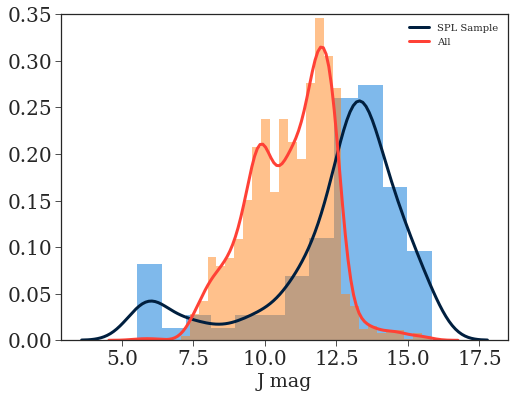

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, ax=plt.subplots(figsize=(8, 6))


sns.distplot(splat_db.J, 
             kde_kws={"color": "#001f3f", "lw": 3, 
                      "label": "SPL Sample"},
             hist_kws={"linewidth": 3,
                       "alpha": 0.5, "color": "#0074D9"},
            ax=ax)

sns.distplot(short.J, 
             kde_kws={"color": "#FF4136", "lw": 3, "label": "All"},
             hist_kws={"linewidth": 3,
                       "alpha": 0.5, "color": "#FF851B"},
            ax=ax)

ax.set_xlabel('J mag', fontsize=19)
ax.set_ylim([0, 0.35])

In [120]:
import splat.plot as splot

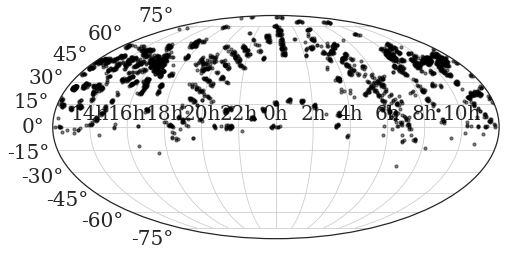

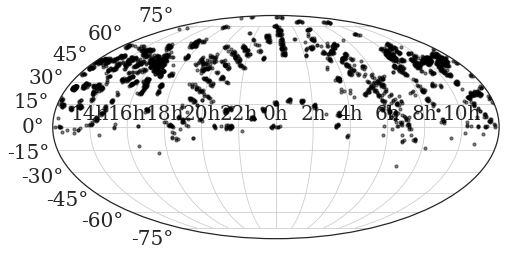

In [130]:
coords=[splat.properCoordinates(x) for x in short['DESIGNATION']]
splot.plotMap(coords)

In [204]:
blake.shape, splat_db.shape, short.shape

((2872, 35), (85, 31), (2575, 23))

In [126]:
splot.plotMap?